
## 텐서플로2를 통한 회귀로 허리둘레 예측하기
* 건강검진 데이터를 바탕으로 허리둘레 예측하기

* 건강검진 센터에서 허리둘레 측정이 누락된 사람이 있다고 가정합니다.
* 검진 데이터를 바탕으로 허리둘레를 예측한다면 건강한 생활습관을 가이드하거나 국민건강을 위한 계획을 수립하는데 도움이 될 것입니다.
* 회귀 모델을 사용해서 건강검진 데이터를 바탕으로 허리둘레를 예측해 봅니다.

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 한글깨짐 설정
# !sudo apt-get install -y fonts-nanum
# !sudo fc-cache -fv
# !rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') 

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (42.1 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and di

In [13]:
df = pd.read_csv("health.csv")
df.shape

(10000, 34)

In [14]:
df.head()

,기준년도,가입자일련번호,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),허리둘레,시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,구강검진 수검여부,치아우식증유무,결손치유무,치아마모증유무,제3대구치(사랑니)이상,치석,데이터공개일자
0,2017,701999,1,11,41,160.0,70.0,88.0,0.6,0.3,1.0,1.0,110.0,62.0,113.0,206.0,102.0,39.0,147.0,12.2,4.0,5.0,12.0,11.0,14.0,2.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
1,2017,47933,1,13,41,165.0,70.0,91.0,0.5,0.6,1.0,1.0,112.0,67.0,86.0,124.0,156.0,36.0,56.0,14.6,1.0,1.2,28.0,23.0,21.0,2.0,0.0,0,NaN,NaN,NaN,NaN,NaN,20181126
2,2017,122314,2,8,47,160.0,55.0,73.0,0.9,1.0,1.0,1.0,104.0,60.0,96.0,166.0,99.0,43.0,103.0,9.9,1.0,0.5,15.0,9.0,17.0,1.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126
3,2017,401875,1,11,41,170.0,70.0,82.0,0.4,0.5,1.0,1.0,119.0,76.0,104.0,243.0,158.0,49.0,162.0,14.8,1.0,1.0,20.0,16.0,17.0,1.0,0.0,1,NaN,NaN,NaN,NaN,0.0,20181126
4,2017,252501,1,13,26,155.0,50.0,90.0,1.2,1.2,1.0,1.0,128.0,84.0,97.0,267.0,243.0,51.0,167.0,15.1,1.0,0.8,44.0,29.0,53.0,3.0,1.0,0,NaN,NaN,NaN,NaN,NaN,20181126


### 02. 탐색적 데이터 분석
---

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 54728 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47532 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 46168 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 47112 missing from current font.
  

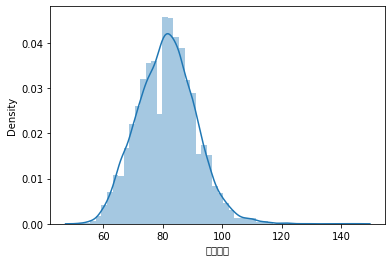

In [15]:
sns.distplot(df["허리둘레"])
plt.show()

In [16]:
df["허리둘레"].describe()

count    10000.000000
mean        81.349810
std          9.721046
min         52.000000
25%         75.000000
50%         81.000000
75%         88.000000
max        145.000000
Name: 허리둘레, dtype: float64

### 03. 데이터 전처리
---

In [17]:
df = df.replace(np.nan, 1)
df.isnull().sum()

기준년도            0
가입자일련번호         0
성별코드            0
연령대코드(5세단위)     0
시도코드            0
신장(5Cm단위)       0
체중(5Kg 단위)      0
허리둘레            0
시력(좌)           0
시력(우)           0
청력(좌)           0
청력(우)           0
수축기혈압           0
이완기혈압           0
식전혈당(공복혈당)      0
총콜레스테롤          0
트리글리세라이드        0
HDL콜레스테롤        0
LDL콜레스테롤        0
혈색소             0
요단백             0
혈청크레아티닌         0
(혈청지오티)AST      0
(혈청지오티)ALT      0
감마지티피           0
흡연상태            0
음주여부            0
구강검진 수검여부       0
치아우식증유무         0
결손치유무           0
치아마모증유무         0
제3대구치(사랑니)이상    0
치석              0
데이터공개일자         0
dtype: int64

In [18]:
feature_names = df.columns.tolist()

feature_names

['기준년도',
 '가입자일련번호',
 '성별코드',
 '연령대코드(5세단위)',
 '시도코드',
 '신장(5Cm단위)',
 '체중(5Kg 단위)',
 '허리둘레',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부',
 '구강검진 수검여부',
 '치아우식증유무',
 '결손치유무',
 '치아마모증유무',
 '제3대구치(사랑니)이상',
 '치석',
 '데이터공개일자']

In [19]:
feature_names = [
 '성별코드',
 '연령대코드(5세단위)',
 '시도코드',
 '신장(5Cm단위)',
 '체중(5Kg 단위)',
 '시력(좌)',
 '시력(우)',
 '청력(좌)',
 '청력(우)',
 '수축기혈압',
 '이완기혈압',
 '식전혈당(공복혈당)',
 '총콜레스테롤',
 '트리글리세라이드',
 'HDL콜레스테롤',
 'LDL콜레스테롤',
 '혈색소',
 '요단백',
 '혈청크레아티닌',
 '(혈청지오티)AST',
 '(혈청지오티)ALT',
 '감마지티피',
 '흡연상태',
 '음주여부',
 '치석',
]

In [20]:
label_name = "허리둘레"
label_name

'허리둘레'

In [23]:
from sklearn.model_selection import train_test_split

X = df[feature_names]
y = df[label_name]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
print(X_train.shape, y_train.shape)
X_train.head()

(8000, 25) (8000,)


,성별코드,연령대코드(5세단위),시도코드,신장(5Cm단위),체중(5Kg 단위),시력(좌),시력(우),청력(좌),청력(우),수축기혈압,이완기혈압,식전혈당(공복혈당),총콜레스테롤,트리글리세라이드,HDL콜레스테롤,LDL콜레스테롤,혈색소,요단백,혈청크레아티닌,(혈청지오티)AST,(혈청지오티)ALT,감마지티피,흡연상태,음주여부,치석
9254,1,10,11,170.0,60.0,1.0,1.2,1.0,1.0,97.0,74.0,77.0,192.0,69.0,52.0,126.0,15.0,1.0,1.1,18.0,10.0,20.0,3.0,1.0,1.0
1561,2,9,46,150.0,35.0,1.2,1.2,1.0,1.0,100.0,60.0,92.0,206.0,80.0,71.0,119.0,11.5,1.0,0.5,38.0,44.0,34.0,1.0,0.0,1.0
1670,2,13,11,145.0,45.0,1.0,1.0,1.0,1.0,144.0,90.0,79.0,263.0,34.0,59.0,197.0,14.3,1.0,0.6,23.0,20.0,19.0,1.0,0.0,0.0
6087,1,9,11,165.0,80.0,0.4,0.5,1.0,1.0,135.0,75.0,223.0,171.0,224.0,44.0,82.0,17.0,3.0,0.8,67.0,62.0,52.0,3.0,1.0,1.0
6669,1,11,26,165.0,70.0,0.8,0.6,1.0,1.0,150.0,100.0,155.0,191.0,230.0,53.0,92.0,15.0,1.0,0.9,22.0,28.0,57.0,2.0,1.0,1.0


### 04. 모델링
---

In [25]:
import tensorflow as tf
from tensorflow import keras

tf.random.set_seed(42)

input_shape = X_train.shape[1]

In [35]:
def build_model():
  model = keras.Sequential([
      keras.layers.Dense(32, activation = 'swish', input_shape = [input_shape]),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(64, activation = 'relu'),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(128, activation = 'relu'),
      keras.layers.Dropout(0.2),
      keras.layers.Dense(1)
  ])

  optimizer = keras.optimizers.Adam(learning_rate=0.0005)

  model.compile(loss='mse', optimizer=optimizer, metrics=['mse', 'mae'])

  return model

my_model = build_model()

In [36]:
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_4 (Dense)              (None, 32)                832       
_________________________________________________________________
dropout_3 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                2112      
_________________________________________________________________
dropout_4 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 128)               8320      
_________________________________________________________________
dropout_5 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 1)                

In [41]:
# early_stop = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=15)
history = my_model.fit(X_train, y_train, epochs=200, verbose=0, validation_split=0.2) # callbacks=[early_stop]

In [42]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mse,mae,val_loss,val_mse,val_mae,epoch
195,42.277431,42.277431,5.113898,97.252647,97.252647,8.352184,195
196,42.787495,42.787495,5.173476,95.164818,95.164818,8.253369,196
197,42.141823,42.141823,5.148337,91.316010,91.316010,8.039921,197
198,42.565598,42.565598,5.131862,120.175636,120.175636,9.457200,198
199,42.406792,42.406792,5.136925,105.506302,105.506302,8.785988,199


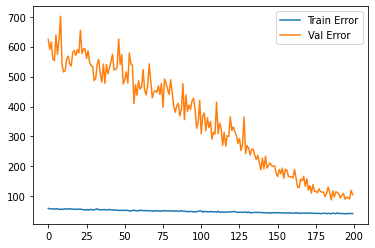

In [43]:
plt.plot(hist['epoch'], hist['mse'], label='Train Error')
plt.plot(hist['epoch'], hist['val_mse'], label = 'Val Error')
plt.legend()

In [44]:
y_pred = my_model.predict(X_test)
y_predict = y_pred.flatten()

In [45]:
my_model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 102.6297 - mse: 102.6297 - mae: 8.6520


[102.62969970703125, 102.62969970703125, 8.651994705200195]

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


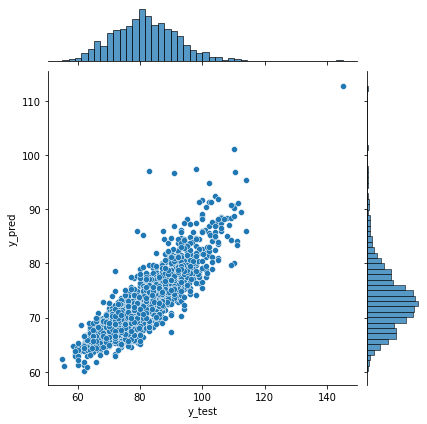

In [46]:
temp = pd.DataFrame({'y_test': y_test, 'y_pred': y_pred.flatten()})
sns.jointplot('y_test', 'y_pred', data=temp)
plt.show()